# data1.dta

In [1]:
import numpy as np
import scipy.stats 
from scipy.optimize import minimize
import pandas as pd

from matplotlib import pyplot as plt
import statsmodels.api as sm
 
%matplotlib inline

In [2]:
df = pd.read_stata('data1.dta')

In [3]:
df

,y,x
0,-1.123592,-1.121670
1,0.265038,1.001219
2,-0.303252,-0.588864
3,-0.781113,-1.608103
4,0.296823,-0.421478
...,...,...
495,-2.020082,-1.213828
496,0.963207,0.222661
497,0.067604,0.244276
498,0.003067,0.318744


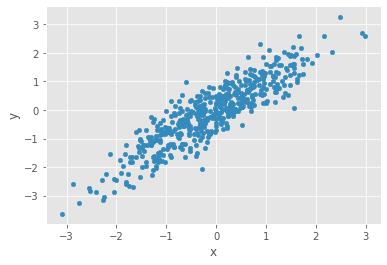

In [4]:
plt.style.use('ggplot')
df.plot.scatter(x = 'x', y = 'y')

In [5]:
# OLS for this question 

df['const'] = 1

import statsmodels.api as sm

reg1 = sm.OLS(endog=df['y'], exog=df[['const', 'x']])

results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     1979.
Date:                Tue, 14 Apr 2020   Prob (F-statistic):          1.33e-175
Time:                        17:19:09   Log-Likelihood:                -362.72
No. Observations:                 500   AIC:                             729.4
Df Residuals:                     498   BIC:                             737.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0055      0.022      0.245      0.8

In [6]:
n = len(df['y'])
y = np.array(df['y']).reshape(n,1) 
x = np.array([np.ones(n),df['x']]).T

In [7]:
inv_xx = np.linalg.inv(x.T @ x)    
beta = inv_xx @ x.T @ y
beta

array([[0.00551034],
       [1.01045927]])

In [8]:
# Here I provide a function for computing OLS parameters and their associated standard errors
def ols(y, x):
    n = len(y)
    
    # computing betas 
    inv_xx = np.linalg.inv(x.T @ x)    
    beta = inv_xx @ x.T @ y
    
    # calculating the standard errors, this is not robust standard errors 
    e = y - x @ beta 
    s = e.T @ e / n
    var_beta = float(s) * inv_xx
    se = np.diag(np.sqrt(var_beta))
    return beta, se


(beta, se) = ols(y,x) 
print  ( '{:>9}  {:>10} {:>11}'.format('', 'beta_1', 'beta_2'))  

print  ( '{:>10} {:>10.5f}  {:>10.5f}'.format('coef:', beta[0,0], beta[1,0]))  

print  ( '{:>10} {:>10.5f}  {:>10.5f}'.format('se:', se[0], se[1]))  

               beta_1      beta_2
     coef:    0.00551     1.01046
       se:    0.02244     0.02267


In [9]:
def SSR(b): 
    b = np.array(b).reshape(2,1)
    e = y - x @ b 
    return (e**2).sum()


result = minimize(SSR, x0 = [0, 0])
result.x

array([0.00551033, 1.01045926])

In [10]:
# Bonus Question 

def ml_obj(b):
    beta = np.array(b[:2]).reshape(2,1)
    sigma =  np.abs(b[-1])      
    f = -np.log(scipy.stats.norm.pdf((y - x @ beta)/sigma)/sigma).mean()
    return f

theta =  [1,1,1]
Method = 'nelder-mead'

result = minimize(ml_obj, theta, method='nelder-mead', options={'maxiter':50000, 'disp' : True})
beta_hat = result.x 

def ml_se(theta_hat):
    theta_hat = theta_hat.reshape(3,1)
    beta = theta_hat[0:2,:]
    sigma = theta_hat[2:,]
    dl_dtheta = np.zeros((len(theta_hat), len(y)))
    gap = 0.001
    step = 1 + gap
    for i in range(len(theta_hat)):
        d_one = np.ones((3,1))
        d_one[i] = step
        dl_dtheta[i,:] =   ((np.log(scipy.stats.norm.pdf((y - x @ (beta* d_one[:2]))/ (sigma* d_one[-1])) /sigma*d_one[-1]) 
                                    - np.log(scipy.stats.norm.pdf((y - x @ beta)/ sigma) / sigma))                             
                            / float(theta_hat[i]*gap)).T

    var = np.sqrt(np.diag(np.linalg.inv(dl_dtheta @ dl_dtheta.T)))
    return var


se = ml_se(beta_hat)


print  ( '{:>5} {:>10}  {:>10}  {:>9}'.format('', 'beta1', 'beta2', 'sigma'))  
print  ( '{:>5} {:>10.5f}  {:>10.5f} {:>10.5f}'.format( 'est:', beta_hat[0], beta_hat[1], beta_hat[2]))  
print  ( '{:>5} {:>10.5f}  {:>10.5f} {:>10.5f}'.format( 'se:', se[0], se[1], se[2]))  

Optimization terminated successfully.
         Current function value: 0.725432
         Iterations: 78
         Function evaluations: 141
           beta1       beta2      sigma
 est:    0.00555     1.01050    0.49982
  se:    0.02263     0.02297    0.00919


# Chile.dta

In [11]:
chile = pd.read_stata('chile.dta')

In [12]:
chile

,ciiu_3d,id,year,routput,totlab,renerg,realmats,rcapstock,rinvest
0,311,18.0,1979,3.464455e+04,29.752502,3669.071289,19116.718750,36556.449219,0.000000
1,311,18.0,1980,4.049039e+04,25.526295,1345.034546,28933.464844,33218.750000,0.000000
2,311,18.0,1981,2.295000e+04,15.840635,536.178467,17161.011719,30198.923828,0.000000
3,311,54.0,1979,2.806862e+04,31.058437,2297.619873,12696.578125,3985.870605,0.000000
4,311,54.0,1980,2.928181e+04,31.058437,2692.184082,15695.653320,3474.200928,0.000000
...,...,...,...,...,...,...,...,...,...
20725,311,266823.0,1996,3.163177e+04,61.043755,920.380798,16618.185547,6247.899414,0.000000
20726,311,266859.0,1996,5.289612e+04,42.613331,4469.363770,54625.023438,103986.210938,-110.619934
20727,311,266913.0,1996,1.272255e+06,447.946442,220187.546875,261003.890625,55586.757812,1079.955322
20728,311,267057.0,1996,1.675325e+04,12.709174,585.734192,13528.258789,1738.448730,0.000000


total number of unique firms: 2673


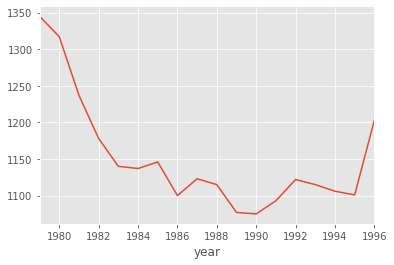

In [13]:
# How many unique ﬁrms are included in this dataset?
print('total number of unique firms:', len(chile['id'].unique()))

chile.groupby(['year'])['id'].count().plot(xlim = (1979, 1996)) 

In [28]:
# On average, how many years of observation do we have for all the ﬁrms? Also, what is the longest and shortest duration?

chile['yob'] = chile.groupby(['id'])['year'].transform(min)

chile['age'] = chile['year'] - chile['yob'] + 1

chile['max_age'] =  chile.groupby(['id'])['age'].transform(max)

print('average duration:', chile.groupby(['id'])['max_age'].mean().mean())

print('maximum duration:', chile['max_age'].max())

print('minimum duration:', chile['max_age'].min())

average duration: 7.807706696595585
maximum duration: 18
minimum duration: 1


In [15]:
# correlation matrix 

chile[chile.columns[3:9]].corr()

,routput,totlab,renerg,realmats,rcapstock,rinvest
routput,1.000000,0.738028,0.627440,0.958528,0.644604,0.397732
totlab,0.738028,1.000000,0.545575,0.688555,0.606957,0.393596
renerg,0.627440,0.545575,1.000000,0.572255,0.624652,0.338236
realmats,0.958528,0.688555,0.572255,1.000000,0.582926,0.361691
rcapstock,0.644604,0.606957,0.624652,0.582926,1.000000,0.502015
rinvest,0.397732,0.393596,0.338236,0.361691,0.502015,1.000000


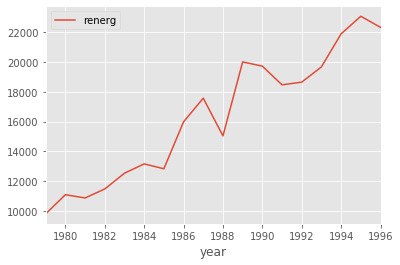

In [16]:
# the industry average for each year, and plot time series plots

ts_mean = chile.groupby('year').mean() 

# just change the y-axis input to other column names
ts_mean.plot(y='renerg', xlim = (1979, 1996))

In [24]:
# OLS for this question 

chile['const'] = 1


chile[['y', 'l', 'e', 'm', 'k']] = np.log(chile[chile.columns[3:8]]) 

X = sm.add_constant(chile[['l', 'e', 'm', 'k']])

import statsmodels.api as sm

reg1 = sm.OLS(endog=chile['y'], exog=X, missing='drop')

results = reg1.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 1.359e+05
Date:                Tue, 14 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:26:10   Log-Likelihood:                -4619.4
No. Observations:               20717   AIC:                             9249.
Df Residuals:                   20712   BIC:                             9289.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3535      0.015     89.079      0.0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


year
1979    1345.0
1980      95.0
1981      47.0
1982      41.0
1983      47.0
1984      74.0
1985      69.0
1986      67.0
1987     139.0
1988      76.0
1989      58.0
1990      63.0
1991      64.0
1992      96.0
1993      60.0
1994      55.0
1995      83.0
1996     194.0
Name: entry, dtype: float64


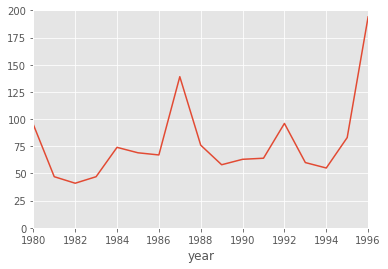

In [18]:
# entries or exits 

# Let's do entries first 

chile['entry'] = (chile['year'] - chile['yob']==0)

annual_entries = chile.groupby('year')['entry'].sum()

print(annual_entries)

# We ingnore the very first year since it is the starting year for our dataset 
# (not very meaning for entries as those firms may enter well before 1979) 

annual_entries.plot(xlim = (1980, 1996), ylim = (0,200))

year
1979     112.0
1980     130.0
1981      98.0
1982      88.0
1983      74.0
1984      65.0
1985     104.0
1986     121.0
1987      84.0
1988      90.0
1989      62.0
1990      56.0
1991      66.0
1992      71.0
1993      67.0
1994      90.0
1995      92.0
1996    1203.0
Name: exit, dtype: float64


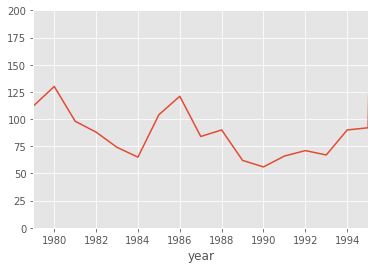

In [19]:
chile['yoe'] = chile.groupby(['id'])['year'].transform(max)
    
chile['exit'] = (chile['year'] - chile['yoe']==0)

annual_exits = chile.groupby('year')['exit'].sum()


print(annual_exits)

# Similar to entries, here we ingnore exits in the very last year  

annual_exits.plot(xlim = (1979, 1995), ylim = (0,200))

In [22]:
chile.id.value_counts().mean()

7.755331088664422